<a href="https://colab.research.google.com/github/andersknudby/Remote-Sensing/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 3 – Program structure and debugging
We’re now ready to start writing some actual code that accomplishes something. To start with we are going to write a little piece of code that runs through numbers between 0 and 100, and tests which ones are divisible by 2 (i.e. which ones are even numbers). Not exactly the next big thing in software, but it will allow us to look at two indispensable elements of programming: loops and conditions. However, before you start plugging away at the keyboard, it is always a really good idea to develop a general idea of how you program is going to work. Doing this well can take a bit of practice, so here’s an idea of what that might look like for the task at hand:

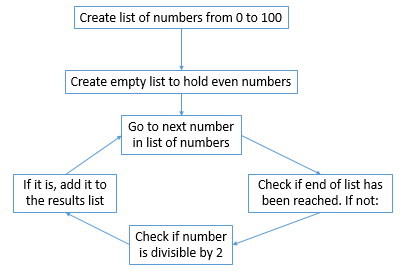

In other words, we first want to create two lists, one that holds the numbers to test, another (initially empty) to hold the numbers we discover are even. That's what is included in the top two boxes in the diagram. We then want to run through the numbers in the first list, one by one, and put them in the second list *if they are even*.
In Python, the first two steps could look like the code below (explanation to follow below):

In [ ]:
numbers = range(101)
evenNumbers = []

The 'range' function creates a list of integers [0, 1, 2, 3...], starting at 0, and with a length equal to the number indicated in the brackets. So range(101) creates the list [0, 1, 2... 100].

The empty square brackets are used to create an empty list.

##For loops
Now we get to that part where we want to run through all the numbers in the list called “numbers” and test if they are divisible by two. When we want to do something over and over again, in Python (and in any other programming language) we can use what is called a ‘loop’. The simplest kind of ‘loop’ is a ‘for loop’, which in our case can look like so:

In [ ]:
for i in numbers:
	print(i, end=" ")

What the statement 'for i in numbers:' does is that it gives the first value in 'numbers' to the variable 'i', and then it goes on to do all that is written on lines that are **indented** under it. When it is done with all the indented lines, it goes back, gives 'i' the second value in 'numbers', does all the stuff on the indented lines under it, goes back, and so on until it has used all the numbers in ‘numbers’. ***Indentations matter in Python, so be careful with them!***

In the code above all we did in the indented lines was to print the value of i. To test if i is even instead, we can take the remainder of a division by 2. We do this with the '%' operator, like this:

In [ ]:
for i in numbers:
	remainder = i%2

Note that when you run the code above, nothing gets printed as output because we didn't tell Python to print anything. But we can add a print line to see the pattern that emerges. Think about that pattern and make sure you understand why it emerges, and what it says about which of hte numbers in 'numbers' are even.

In [ ]:
for i in numbers:
  remainder = i%2
  print(remainder, end=" ")

##If - Else statements
Testing whether something is true or notis done with an 'if' statement. In our case, we want to test whether each number in 'numbers' is even, which is the same as testing whether the remainder, when it has been divided by 2, is zero. So we can write something like 'if remainder is zero'... then the number is even. One important thing to keep in mind here: While you can indeed use the word 'is' in Python, and in our case right now i will work just fine, you should instead use '==' to check whether two things are equal. The reason is that '==' tests the equality of two variables, but 'is' checks whether two variables point to the same object in memory. Sometimes 'is' will work just fine instead of '==', but sometimes it won't.

In our case it should look like this (still indented under the for loop!):

In [ ]:
if remainder == 0:
	print(str(i) + " is even")

If you run the code block above, you will get the result '100 is even', because in the previous code block we ran through all the numbers in 'numbers', ending with '100'. So at this point in the notebook i is 100, and remainder is 0.

The 'if' keyword tells Python that a test of a condition is coming, and the '==' tells Python that what we want to test is whether something (to the left of the '==' sign) is equal to something else (to the right of the '==' sign). Other condition operators include '!=' (not equal to), '>' (greater than), '<' (smaller than), '>=' (greater than or equal to), and '<=' (smaller than or equal to).
Technically, the product of any of the above tests is a Boolean (logical) value, which can be either 'True' or 'False'. True and False (with uppercase 'T' and 'F') are keywords in Python (like 'print', 'if', 'for', and others) so only use them when you want to denote a Boolean value.
Indented under the 'if' statement you put lines of code that tell Python what to do ***if*** the condition is true. In our case, if the condition is true then 'i' is an even number, and we want to add it to the list of results. We do it like this (the last line needs to be indented twice because it resides under both the 'for' loop and the 'if' statement):


In [ ]:
numbers = range(101)
evenNumbers = []

for i in numbers:
  remainder = i%2
  if remainder == 0:
    evenNumbers.append(i)

If you want to do something in case the condition in the 'if' statement is not true, you can add an 'else' statement under the lines indented under the 'if' statement, but at the same indentation level as the 'if statement', like so:

In [ ]:
for i in numbers:
  remainder = i%2
  if remainder == 0:
    evenNumbers.append(i)
  else:
    print("uneven", end=" ")

The 'else' statement is not needed for the present purposes because we only care about the even numbers. At this point we are practically done with the coding, because after the stuff under the 'if' statement has been done (or not, depending on whether the conditions was true or not), the program will return to the 'for i in numbers' statement, give the next value in 'numbers' to 'i', and so on. When there are no more numbers in 'numbers', the program will move on to the next unindented line (more specifically, the next line that is at the same indentation level as the 'for' statement).
We can therefore end the program with a print statement:


In [ ]:
numbers = range(101)
evenNumbers = []

for i in numbers:
  remainder = i%2
  if remainder == 0:
    evenNumbers.append(i)

print(evenNumbers)

Remember I mentioned in Chapter 2 that NumPy arrays are good for running the same operation on a whole bunch of numbers at the same time? We could actually have used that approach instead of the for loop to dramatically shorten the code by using NumPy's 'where' function, which finds all instances in an array for which a specified condition is 'True'. In the example below, that conditions is 'remainders == 0'. We need to use the little '[0]' because np.where actually gives us a two-dimensional array, but we only want the first dimension. You can try to remove it and see what happens, the output is more or less the same, just not as pretty.

In [ ]:
import numpy as np
numbers = np.asarray(range(101))
remainders = numbers%2
result = list(np.where(remainders == 0)[0])
print(result)

##Debugging
When you have some experience and need to write a really simple program, chances are you might pull off writing the code perfectly the first time around, but I wouldn’t bet on it. And as soon as you start writing more complex pieces of code, and especially when you get into unfamiliar programming territory, I guarantee you that you will write a piece of code, run it, and get an error message that is not immediately comprehensible. When that happens, you need to do what is called ‘debugging’. This is one of the few things I find that notebooks are ***not*** good at compared to a normal IDE, but they are not terrible either so we'll stick with them.

#####Three kinds of errors in programming
Very broadly speaking, we can categorize three different kinds of errors in programming.
* **Syntax errors**: There are typically typos that actually prevent the program from running in the first place. In the last line of the code, try deleting the ‘t’ from ‘print’, and click ‘Run’. You get an error saying that the name ‘prin’ it not defined. Easy to fix, syntax errors are the really good kind of errors.
* **Semantic errors**: These are the kinds of errors that will allow your program to run, it will just not run correctly. In other words, it will produce a result, it will just be the wrong result. These are some of the hardest errors to fix, because Python is doing exactly what you told it to – it’s just that you told it to do something slightly different from what you actually wanted! The error that we are going to debug is a semantic error.
* **Run-time errors**: Even if you have written syntactically and semantically correct code, you can still run into run-time errors when your computer is unable to do what you are asking of it. Running out of memory is the most common type of run-time error. We will try very hard to avoid such errors in this course because fixing them requires a deeper knowledge of computers than what we are aiming for here.

After you have learned the basics, more than 90% of all the time you spend debugging will probably be on semantic errors, so we will focus on those. Try running the code block below:

In [ ]:
firstNumber = input('Enter the first number:')
secondNumber = input('Enter the second number:')
sum = firstNumber + secondNumber

print(firstNumber + ' and ' + secondNumber + ' is ' + sum, sep="")

Before we get to the semantic error, we'll just have a quick look at some of the new things in that code block.

* The function 'input' asks the user for some input, and then stores it in a variable.

* The '+' in the print argument is used to print several statements or variables after each other on the same line.

* The 'sep=""' argument in the print statement is used to indicate what we want to use to separate each of those statements or variables.

Now, what was the semantic error? If you're not sure you might have to go back and read through parts of Chapter 1 again.

Debugging semantic errors is hard. My suggestion, in general terms, is to go through the code in chunks and check that the result of each chunk is what you expect. You can put each chunk in a code block to organize them. At some point you may discover that something is not quite what you expected - a value is not what it should be, or a variable doesn't exist, or an 'if' function doesn't give the result you think it should. At that point you can use lots of print statements to constantly see what the value of each variable is, and lots of type statements to find out what type each variable is. The latter should give you good clues as to what is wrong in the code block above.

Debugging syntax errors is much easier because Python will immediately tell you waht's wrong. Like here (run the code block to see what happens):

In [ ]:
pint("I just made a typo")

When you get error like that, make it a habit to actually read the error message. Much of the time it will actually tell you what is wrong - but honestly sometimes it's not helpful at all. But sometimes the part of youer code in which the error appears can be a bit deceiving because you may have a semantic error in one code block that leads to a syntax error in the next one. Try these two code blocks for example:

In [ ]:
populationOfCanada = "37590000"
populationOfOntario = "14570000"

In [ ]:
proportionOfPopulationInOntario = populationOfOntario / populationOfCanada

Run-time errros are something we'll ideally not deal with in this course, but sometimes they happen anyway. A common run-time error is the infinite loop, in which you code keeps doing X until Y happens... but Y never happens. Here's an example, but before you run it you should be aware of two things:
* In colab, you can stop the execution of a code block using the little 'stop' button on the left side of the block.
* You can clear the output from a code block using the button at the top left of the output area. (You are going to need to do that, because the block below keeps printing stuff until you stop it.) 

In [ ]:
x = 2

while x > 0:
  print(x)
  print("This loop never ends because x is always 2")

##Exercise
1\) In a new notebook, write some code that takes integers ranging from 0 to 999, puts all the values divisible by 7 into a new list, converts that list to a NumPy array, and multiplies it by 3.

2\) In a new notebook, write some code that finds all prime numbers from 0 to 1000. This is not an easy task, and if you get stuck I suggest the following steps:

* First look online for inspiration. The reason why this is a good step is that it forces you to think about what to search for, and then evaluate whether what you find is what you wanted.
* As a last resort, look through the code below, but **don't look at the code below if you want to come up with your own solution to the exercise!**


In [ ]:
# Code to find prime numbers up to 1000
# Remember, prime numbers are those that are only divisible by 1 and the number itself

# First we define an empty list to contain our prime numbers
primes = []

# Then we run through all then number from 1 to 1000 and check if they are divisible by anything other than 1 and the number itself
# To speed things up a bit, we actually just need to test if they are divisble by anything ranging from 2 to the number itself minus 1.

# Note on the use of range below:
# 1) By default, range starts counting at 0, so to avoid testing 0 we use an additional 'start' argument, setting it to 1
# 2) Also, we add one to the 'stop' argument because of how range counts. If we want our last value to be 1000, we have to set 'stop' to 1000 + 1.

for i in range(1, 1000 + 1):
  isPrime = True  # Until we find a value (in the right range) that i is divisible by, we will assume it is a prime
  for x in range(2, i):  # This defines the range of values that we need to see if 'i' is divisible by. We ignore 1, and i itself
    if i%x == 0:  # If i is divisible by x, then...
      isPrime = False  # Not a prime number
      break  # No need to test all the remaining numbers
  
  # Note that if we check i%x for all values of x, and i%x is never == 0, then isPrime is still 'True'
  if isPrime == True:
    primes.append(i)

print("Primes: ", end="")
print(primes)



Primes: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
